C:\Users\Rafae\AppData\Local\Temp\ipykernel_20580\1302733701.py:27: RuntimeWarning: invalid value encountered in divide
  grad = dE / dP


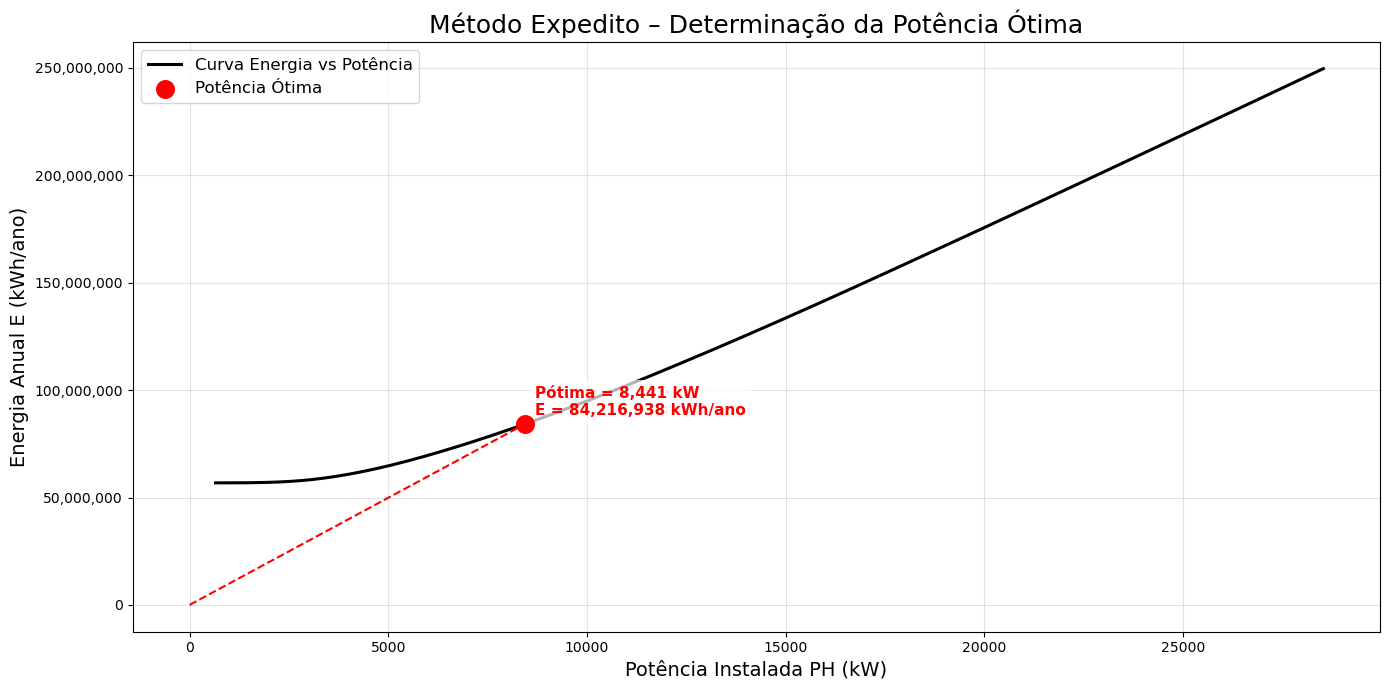


     RESULTADOS - MÉTODO EXPEDITO

             Estatística          Valor
     Potência Ótima (kW)       8,440.65
 Energia Ótima (kWh/ano)  84,216,938.49
Energia Máxima (kWh/ano) 249,696,762.80
    Potência Mínima (kW)         652.89
    Potência Máxima (kW)      28,530.71

Imagem salva em: Graficos/Metodo_Expedito_Potencia_Otima.png



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os

# ============================================
# 1) Ler planilha
# ============================================
arquivo = "Cálculo da PCH-SOLAR.xlsx"
df = pd.read_excel(arquivo, sheet_name="Benefício Econômico (PCH)")

# ============================================
# 2) Selecionar e ordenar colunas
# ============================================
df = df[["PH kW", "e kWh/ano"]].dropna()
df = df.sort_values(by="PH kW", ascending=True).reset_index(drop=True)

P = df["PH kW"].values
E = df["e kWh/ano"].values

# ============================================
# 3) Derivada numérica (método expedito)
# ============================================
dE = np.diff(E)
dP = np.diff(P)
grad = dE / dP

idx = np.argmin(np.abs(grad))

P_otima = P[idx]
E_otima = E[idx]
grad_otimo = grad[idx]

# ============================================
# 4) Criar pasta
# ============================================
os.makedirs("Graficos", exist_ok=True)

# ============================================
# 5) Plot
# ============================================
plt.figure(figsize=(14,7))

# (A) Tira notação científica no Y
plt.ticklabel_format(style="plain", axis="y")

# (B) Formatação com separador de milhares
plt.gca().yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"{x:,.0f}")
)

# Linha principal
plt.plot(P, E, color="black", linewidth=2.2, label="Curva Energia vs Potência")

# Ponto ótimo
plt.scatter(P_otima, E_otima, s=160, color="red", zorder=5, label="Potência Ótima")

# Linha auxiliar
plt.plot([0, P_otima], [0, E_otima], linestyle="--", color="red", linewidth=1.5)

# Texto informativo
dx = 0.03 * P_otima
dy = 0.05 * E_otima

plt.text(P_otima + dx, E_otima + dy,
         f"Pótima = {P_otima:,.0f} kW\nE = {E_otima:,.0f} kWh/ano",
         fontsize=11, color="red", weight="bold",
         bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

plt.title("Método Expedito – Determinação da Potência Ótima", fontsize=18)
plt.xlabel("Potência Instalada PH (kW)", fontsize=14)
plt.ylabel("Energia Anual E (kWh/ano)", fontsize=14)

plt.grid(alpha=0.35)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("Graficos/Metodo_Expedito_Potencia_Otima.png", dpi=300)
plt.show()

# ============================================
# 6) Tabela estatística formatada
# ============================================
def fmt(x):
    return f"{x:,.2f}"

estatisticas = {
    "Potência Ótima (kW)": fmt(P_otima),
    "Energia Ótima (kWh/ano)": fmt(E_otima),
    "Energia Máxima (kWh/ano)": fmt(E.max()),
    "Potência Mínima (kW)": fmt(P.min()),
    "Potência Máxima (kW)": fmt(P.max())
}

df_estat = pd.DataFrame(list(estatisticas.items()),
                        columns=["Estatística", "Valor"])

print("\n==============================")
print("     RESULTADOS - MÉTODO EXPEDITO")
print("==============================\n")
print(df_estat.to_string(index=False))
print("\nImagem salva em: Graficos/Metodo_Expedito_Potencia_Otima.png\n")


C:\Users\Rafae\AppData\Local\Temp\ipykernel_20580\4121626769.py:29: RuntimeWarning: invalid value encountered in divide
  grad = dBL / dP


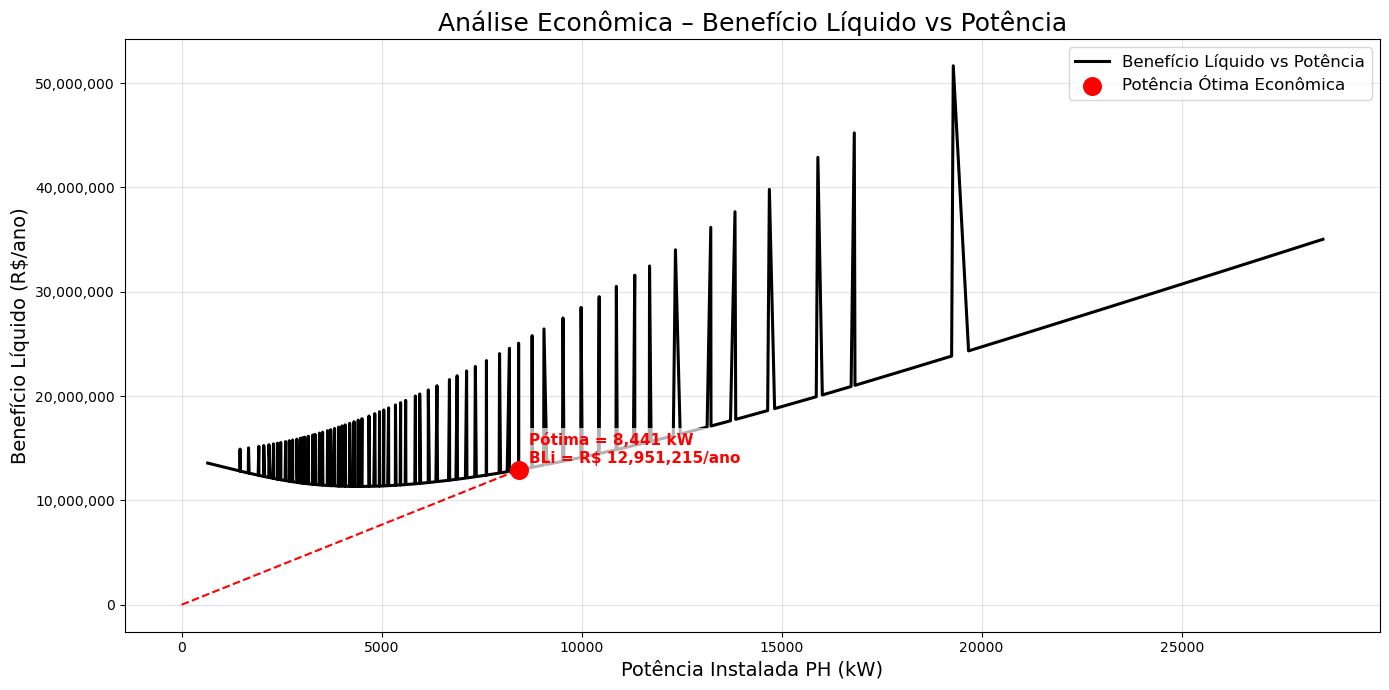


     RESULTADOS ECONÔMICOS

                     Estatística         Valor
   Potência Econômica Ótima (kW)      8,440.65
Benefício Líquido Ótimo (R$/ano) 12,951,214.75
       Benefício Máximo (R$/ano) 51,662,962.32
            Potência Mínima (kW)        652.89
            Potência Máxima (kW)     28,530.71

Imagem salva em: Graficos/BLi_vs_Potencia.png



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os

# ============================================
# 1) Ler planilha
# ============================================
arquivo = "Cálculo da PCH-SOLAR.xlsx"
df = pd.read_excel(arquivo, sheet_name="Benefício Econômico (PCH)")

# ============================================
# 2) Selecionar e ordenar colunas
# ============================================
df = df[["PH kW", "Beneficio liquido (BLi) - R$/ano"]].dropna()

df = df.sort_values(by="PH kW", ascending=True).reset_index(drop=True)

P = df["PH kW"].values
BLi = df["Beneficio liquido (BLi) - R$/ano"].values

# ============================================
# 3) Derivada numérica (ponto ótimo econômico)
# ============================================
dBL = np.diff(BLi)
dP = np.diff(P)

grad = dBL / dP

idx = np.argmin(np.abs(grad))

P_otima = P[idx]
BL_otimo = BLi[idx]

# ============================================
# 4) Criar pasta para salvar
# ============================================
os.makedirs("Graficos", exist_ok=True)

# ============================================
# 5) Plot
# ============================================
plt.figure(figsize=(14,7))

# sem notação científica e com separador de milhares
plt.ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"{x:,.0f}")
)

# Curva principal
plt.plot(P, BLi, color="black", linewidth=2.2,
         label="Benefício Líquido vs Potência")

# Ponto ótimo
plt.scatter(P_otima, BL_otimo, s=160, color="red",
            zorder=5, label="Potência Ótima Econômica")

# Reta auxiliar (opcional)
plt.plot([0, P_otima], [0, BL_otimo], linestyle="--",
         color="red", linewidth=1.5)

# Texto informativo
dx = 0.03 * P_otima
dy = 0.05 * BL_otimo

plt.text(P_otima + dx, BL_otimo + dy,
         f"Pótima = {P_otima:,.0f} kW\nBLi = R$ {BL_otimo:,.0f}/ano",
         fontsize=11, color="red", weight="bold",
         bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

plt.title("Análise Econômica – Benefício Líquido vs Potência", fontsize=18)
plt.xlabel("Potência Instalada PH (kW)", fontsize=14)
plt.ylabel("Benefício Líquido (R$/ano)", fontsize=14)

plt.grid(alpha=0.35)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("Graficos/BLi_vs_Potencia.png", dpi=300)
plt.show()

# ============================================
# 6) Tabela final
# ============================================
def fmt(x):
    return f"{x:,.2f}"

estatisticas = {
    "Potência Econômica Ótima (kW)": fmt(P_otima),
    "Benefício Líquido Ótimo (R$/ano)": fmt(BL_otimo),
    "Benefício Máximo (R$/ano)": fmt(BLi.max()),
    "Potência Mínima (kW)": fmt(P.min()),
    "Potência Máxima (kW)": fmt(P.max())
}

df_estat = pd.DataFrame(list(estatisticas.items()),
                        columns=["Estatística", "Valor"])

print("\n==============================")
print("     RESULTADOS ECONÔMICOS")
print("==============================\n")
print(df_estat.to_string(index=False))
print("\nImagem salva em: Graficos/BLi_vs_Potencia.png\n")


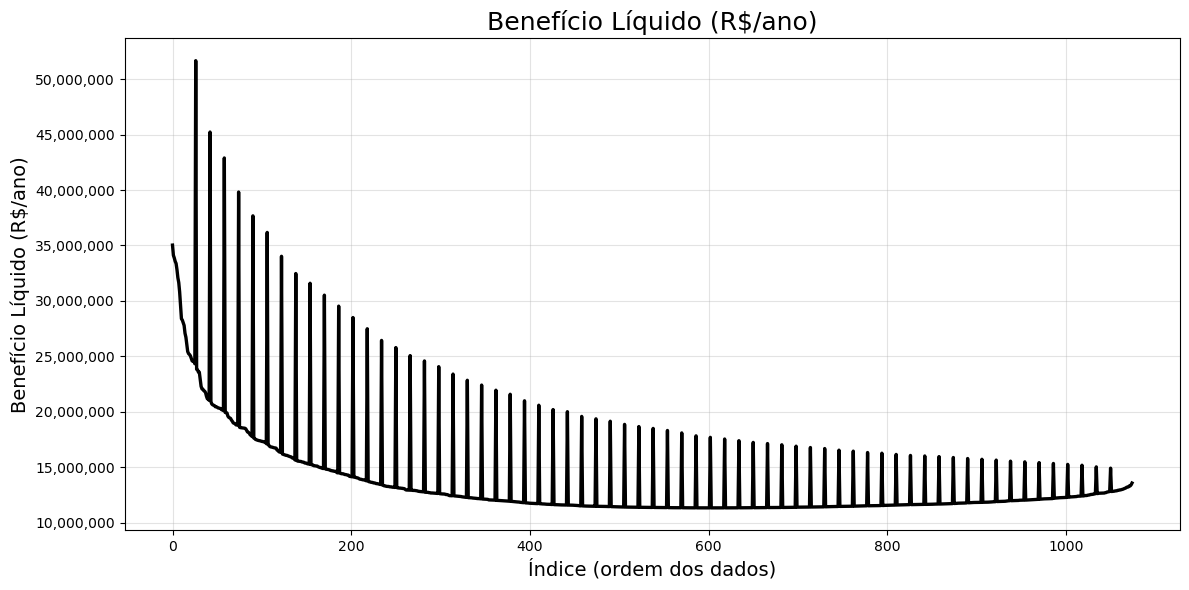

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# ============================================
# 1) Ler planilha
# ============================================
arquivo = "Cálculo da PCH-SOLAR.xlsx"
df = pd.read_excel(arquivo, sheet_name="Benefício Econômico (PCH)")

# ============================================
# 2) Selecionar apenas o BLi
# ============================================
y = df["Beneficio liquido (BLi) - R$/ano"].dropna().reset_index(drop=True)

# ============================================
# 3) Plot
# ============================================
plt.figure(figsize=(12,6))

plt.ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"{x:,.0f}")
)

plt.plot(y, linewidth=2.4, color="black")

plt.title("Benefício Líquido (R$/ano)", fontsize=18)
plt.xlabel("Índice (ordem dos dados)", fontsize=14)
plt.ylabel("Benefício Líquido (R$/ano)", fontsize=14)

plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()



 ANÁLISE DO BENEFÍCIO LÍQUIDO

Total de pontos          : 1075
Pontos com LUCRO         : 1075
Pontos no EQUILÍBRIO     : 0
Pontos com PREJUÍZO      : 0


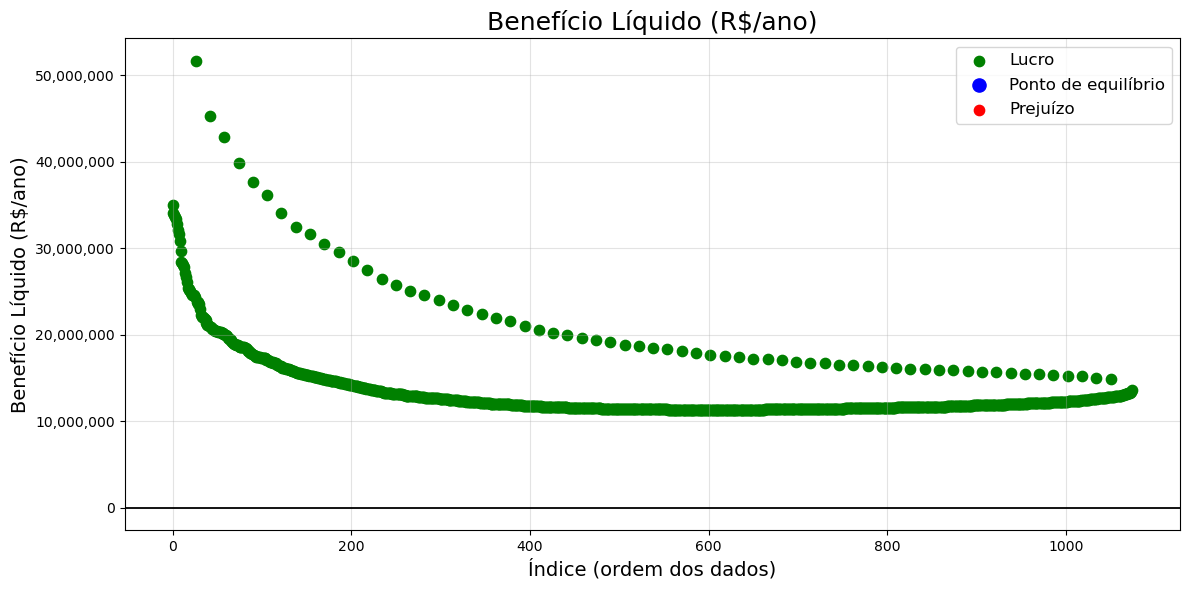

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

# ============================================
# 1) Ler planilha
# ============================================
arquivo = "Cálculo da PCH-SOLAR.xlsx"
df = pd.read_excel(arquivo, sheet_name="Benefício Econômico (PCH)")

# ============================================
# 2) Selecionar apenas o BLi
# ============================================
y = df["Beneficio liquido (BLi) - R$/ano"].dropna().reset_index(drop=True)

# ============================================
# 3) Classificação lucro / zero / prejuízo
# ============================================
cond_lucro = y > 0
cond_zero  = y == 0
cond_prej  = y < 0

# ============================================
# 4) Relatório simples no terminal
# ============================================
print("\n============================")
print(" ANÁLISE DO BENEFÍCIO LÍQUIDO")
print("============================\n")

print(f"Total de pontos          : {len(y)}")
print(f"Pontos com LUCRO         : {cond_lucro.sum()}")
print(f"Pontos no EQUILÍBRIO     : {cond_zero.sum()}")
print(f"Pontos com PREJUÍZO      : {cond_prej.sum()}")

if cond_prej.any():
    idx_primeiro_prej = cond_prej.idxmax()
    print(f"\nPrimeira ocorrência de prejuízo no índice: {idx_primeiro_prej}")
    print(f"Valor: {y[idx_primeiro_prej]:,.2f} R$/ano")

# ============================================
# 5) Plot
# ============================================
plt.figure(figsize=(12,6))

# Formatação do eixo Y
plt.ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"{x:,.0f}")
)

# Plot colorido por condição
plt.scatter(
    y.index[cond_lucro], 
    y[cond_lucro], 
    color="green", s=55, label="Lucro"
)

plt.scatter(
    y.index[cond_zero], 
    y[cond_zero],
    color="blue", s=90, label="Ponto de equilíbrio"
)

plt.scatter(
    y.index[cond_prej], 
    y[cond_prej], 
    color="red", s=55, label="Prejuízo"
)

# Linha horizontal em BLi=0
plt.axhline(0, color="black", linewidth=1.3)

# Configuração visual
plt.title("Benefício Líquido (R$/ano)", fontsize=18)
plt.xlabel("Índice (ordem dos dados)", fontsize=14)
plt.ylabel("Benefício Líquido (R$/ano)", fontsize=14)

plt.grid(alpha=0.35)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
